In [23]:
%load_ext autoreload
%autoreload 2

In [24]:
from preprocessing.preprocess_ucr import UCRDatasetImporter
from preprocessing.preprocess_ucr import UCRDataset
from preprocessing.preprocess_ucr import AugUCRDataset
from preprocessing.data_pipeline import build_data_pipeline
from utils import (
    load_yaml_param_settings,
    get_root_dir,
    model_filename,
)
from examine_data import Examiner
import matplotlib.pyplot as plt
import numpy as np

In [25]:
config_dir = get_root_dir().joinpath("configs", "config.yaml")
config = load_yaml_param_settings(config_dir)


config["augmentations"]["time_augs"]


['slice_and_shuffle']

In [26]:
# ['SonyAIBORobotSurface1', 'SonyAIBORobotSurface2', 'Symbols','Mallat']
UCR_SUBSET = [
    "ElectricDevices",
    "StarLightCurves",
    "Wafer",
    "ECG5000",
    "TwoPatterns",
    "FordA",
    "UWaveGestureLibraryAll",
    "FordB",
    "ShapesAll",
    'SonyAIBORobotSurface1', 
    'SonyAIBORobotSurface2', 
    'Symbols',
    'Mallat'
]
examiner = Examiner(datasets=UCR_SUBSET)

self.X_train.shape: (8926, 96)
self.X_test.shape: (7711, 96)
# unique labels (train): [0 1 2 3 4 5 6]
# unique labels (test): [0 1 2 3 4 5 6]
self.X_train.shape: (1000, 1024)
self.X_test.shape: (8236, 1024)
# unique labels (train): [0 1 2]
# unique labels (test): [0 1 2]
self.X_train.shape: (1000, 152)
self.X_test.shape: (6164, 152)
# unique labels (train): [0 1]
# unique labels (test): [0 1]
self.X_train.shape: (500, 140)
self.X_test.shape: (4500, 140)
# unique labels (train): [0 1 2 3 4]
# unique labels (test): [0 1 2 3 4]
self.X_train.shape: (1000, 128)
self.X_test.shape: (4000, 128)
# unique labels (train): [0 1 2 3]
# unique labels (test): [0 1 2 3]
self.X_train.shape: (3601, 500)
self.X_test.shape: (1320, 500)
# unique labels (train): [0 1]
# unique labels (test): [0 1]
self.X_train.shape: (896, 945)
self.X_test.shape: (3582, 945)
# unique labels (train): [0 1 2 3 4 5 6 7]
# unique labels (test): [0 1 2 3 4 5 6 7]
self.X_train.shape: (3636, 500)
self.X_test.shape: (810, 500)
# un

In [27]:
STAGE1_AUGS = ["gaussian_noise"]

AUG_ID = {
    "gaussian_noise": ["J4D3NQ","Q1A6TB", "CYVIE9","2KCBSS","SIPCYD","DQZWZT"],
    "slice_and_shuffle":["6AAE13", "XKF8ZB", "P6MCKO", "WO3S0Z","Y3A7B9", "OQFZY4", "MKA6WK", "N7NDDJ", "PWECBS", "XF3BTF"],
    "window_warp": ["GDAQEN", "WIZQZ6", "75MW58", "T3PZKA", "52933I", "NAZB6U"]
}
AUG_ID[STAGE1_AUGS[0]]

['J4D3NQ', 'Q1A6TB', 'CYVIE9', '2KCBSS', 'SIPCYD', 'DQZWZT']

In [28]:
model_name = "barlowtwins-stage2-seed5-Q1A6TBfinetunefull_embed-ShapesAll"
parts = model_name.split("-")
len("finetunefull_embed")
parts[-2][:-18]
# parts[-1][:-5]

'Q1A6TB'

In [33]:
import os

def search_relevant_ids(config, AUG_IDS):

    def is_relevant(model_name, dataset_name, seed, method):
        parts = model_name.split("-")
        # Get maskgits
        relevant = "maskgit" in parts
        # print("init relevance", relevant)
        # # dont include decorr
        relevant &= "decorr" not in parts
        # print("decorr relevance", relevant)

        relevant &= dataset_name == parts[-1][:-5]  # len(.ckpt) = 5
        # print("dataset relevance", relevant)
        print(parts)
        relevant &= seed == int(parts[-3])
        # print("seed relevance", relevant)
        if method != "":
            relevant &= method == parts[0]

        return relevant

    dataset_name = config["dataset"]["dataset_name"]
    seed = config["seed"]
    method = config["SSL"]["stage1_method"]

    ids = []
    for model_name in os.listdir("saved_models"):
        if is_relevant(model_name, dataset_name, seed, method):
            if method != "":
                ids.append(model_name.split("-")[-2][:-18])
            else:
                ids.append(model_name.split("-")[-2])
    ids = np.intersect1d(np.unique(ids), AUG_IDS)
    return ids



In [34]:
config_dir = get_root_dir().joinpath("configs", "config.yaml")
config = load_yaml_param_settings(config_dir)

search_relevant_ids(config, AUG_ID[STAGE1_AUGS[0]])

IndexError: list index out of range

In [12]:
# examiner.plot_datasets(train=False)
import numpy as np
list(np.intersect1d(AUG_ID[STAGE1_AUGS[0]],["J4D3NQ","Q1A6TB", "CYVIE9"]))

['CYVIE9', 'J4D3NQ', 'Q1A6TB']

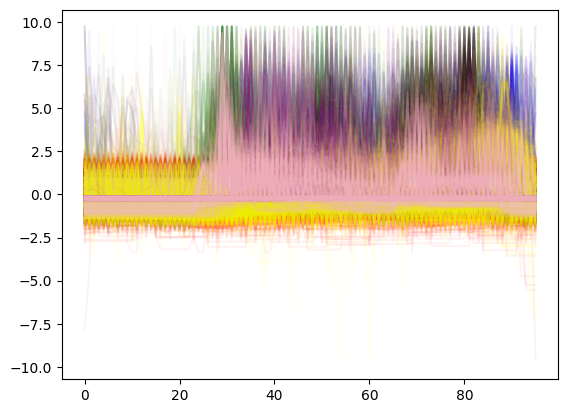

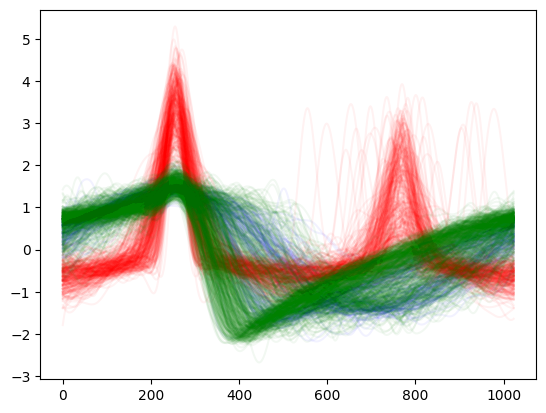

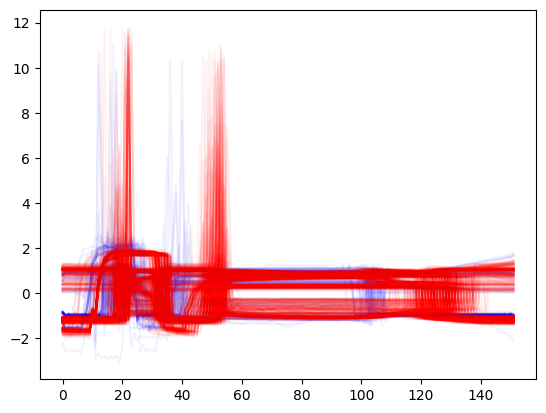

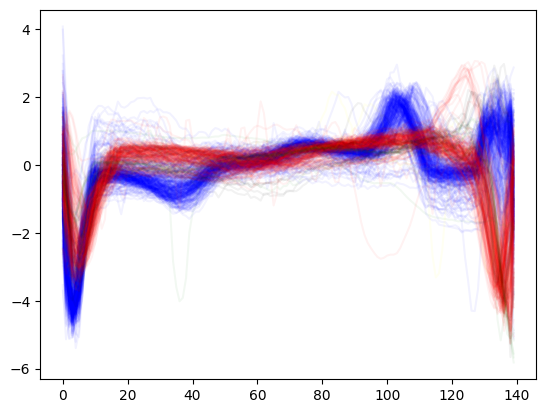

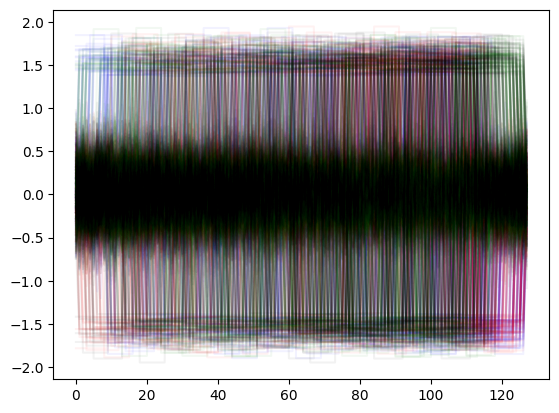

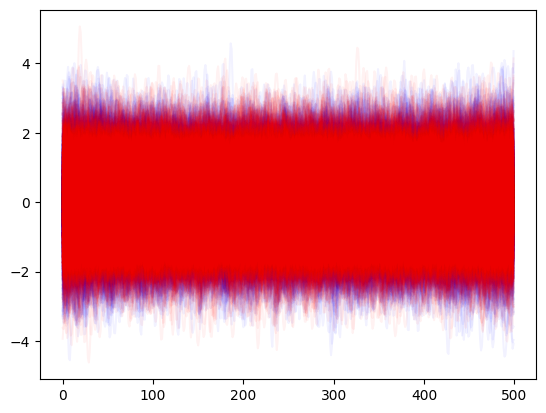

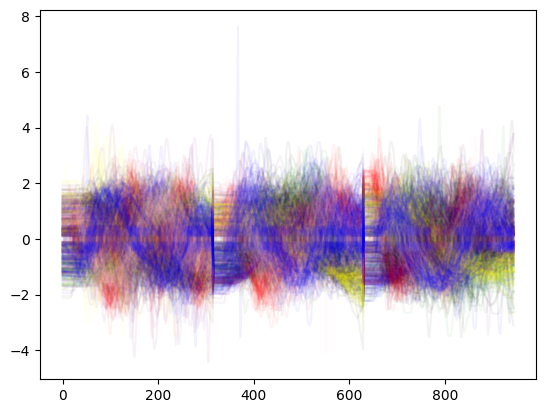

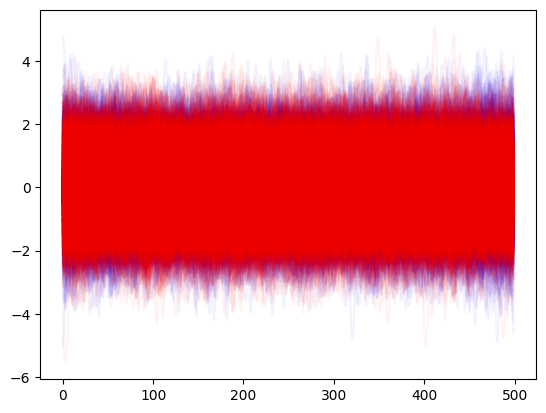

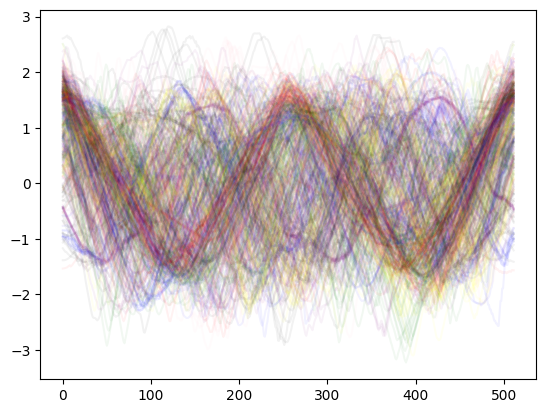

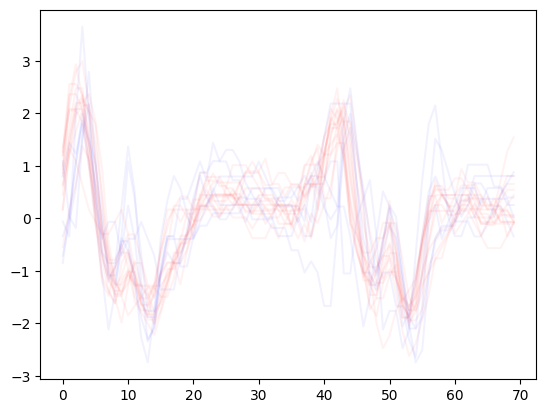

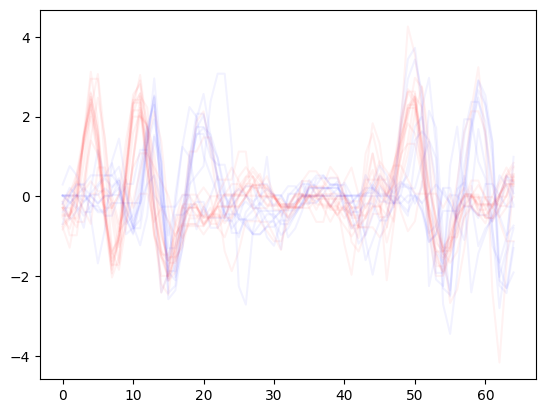

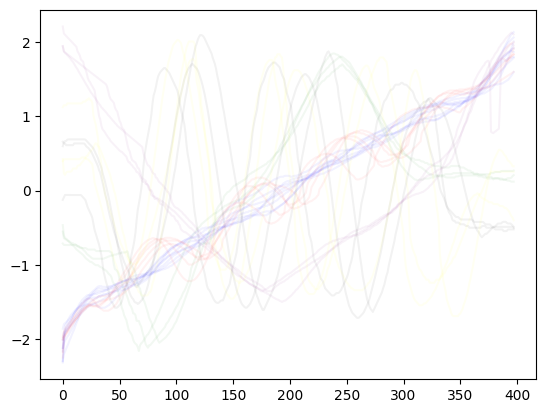

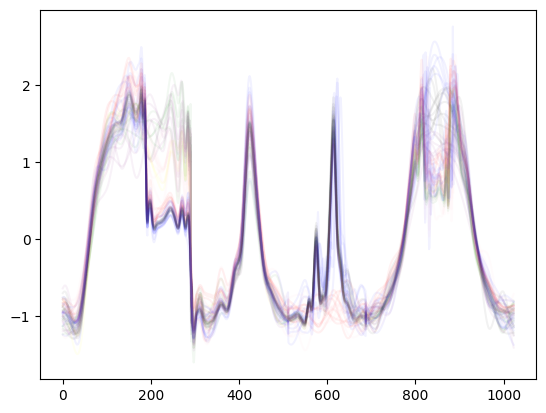

In [27]:
examiner.plot_datasets()

In [5]:
examiner.load_models("TwoPatterns")

/Users/johanvikmathisen/Desktop/Fag/Matematikk/Master/Generative-SSL-VQVAE-modelling/saved_models
encoder-seed-4-000000-TwoPatterns.ckpt


FileNotFoundError: [Errno 2] No such file or directory: '/var/folders/tz/7b83mvms205g7153tt6m1lnr0000gn/T/encoder-seed-4-000000-TwoPatterns.ckpt'

In [10]:
# for i in range(5):
#     for j in range(8):
#         examiner.PCA_latent(z_tr[:,:,i,j],y_tr)

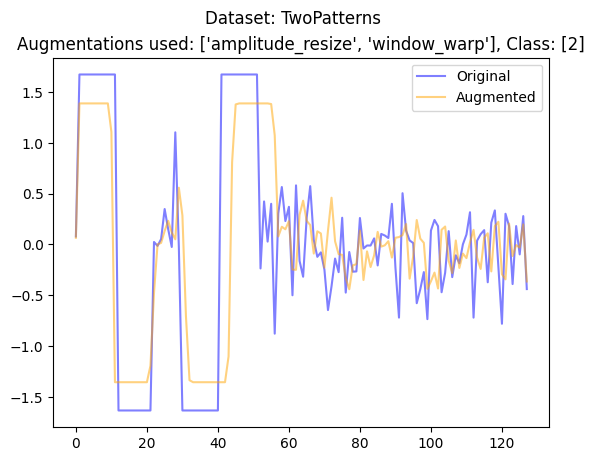

In [8]:

# examiner.load_models("TwoPatterns", decorr= True)
examiner.update_config()
config = examiner.get_config()
# time_augs = ['slope']
# timefreq_augs = []
# aug_params = config['augmentations']['aug_params']
use_all_methods = True
augmenter = examiner.load_augmenter(**config["augmentations"])
# augmenter = examiner.load_augmenter(time_augs, time_augs, aug_params, use_all_methods)

x_aug = examiner.augment_samples(n_samples=1)

In [192]:
z_tr, y_tr, z_te, y_te = examiner.get_latents("StarLightCurves")

In [193]:
import torch.nn.functional as F
z_tr_pool = F.adaptive_avg_pool2d(z_tr, (1, 1)).squeeze(-1).squeeze(-1)
z_te_pool = F.adaptive_avg_pool2d(z_te, (1, 1)).squeeze(-1).squeeze(-1)


In [194]:
z_te_pool.shape

torch.Size([8236, 64])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


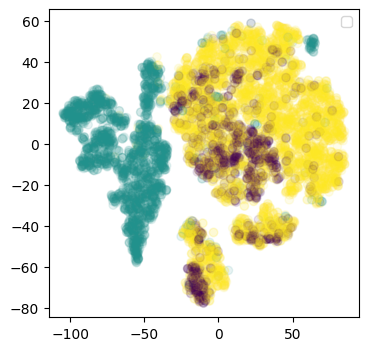

In [195]:
from sklearn.manifold import TSNE
z_tsne = TSNE(
            n_components=2, learning_rate="auto", init="random"
        ).fit_transform(z_te_pool)

plt.figure(figsize=(4, 4))
plt.scatter(z_tsne[:, 0], z_tsne[:, 1], c=y_te, alpha=0.1)
plt.legend()
plt.show()
plt.close()

In [196]:
from examine_data import probes

probe_res = probes(z_tr_pool,z_te_pool, y_tr, y_te)

In [197]:
print(probe_res)

{'knn_accuracy': 0.87178241864983, 'svm_accuracy': 0.9108790675084992}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


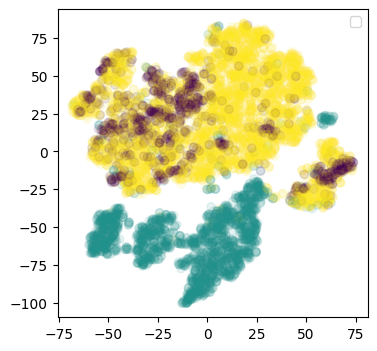

In [199]:
examiner.TSNE_latents(z_te,y_te)

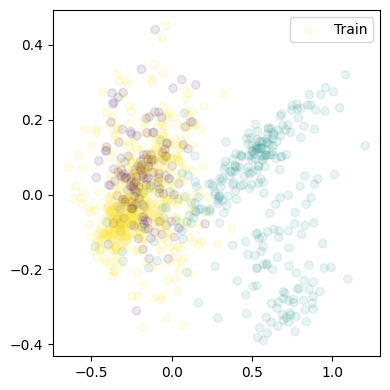

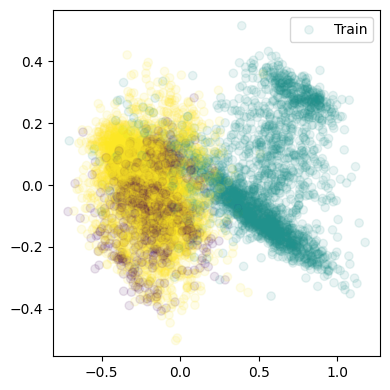

In [201]:
examiner.PCA_latent(z_tr, y_tr)
examiner.PCA_latent(z_te, y_te)
